<a href="https://colab.research.google.com/github/Elizaddh/Neural_Network/blob/16input500output/Reconstruction_DeepNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#load dataset
import numpy as np

X= np.loadtxt("/content/drive/My Drive/Dataset_DNN/training_output_data_transformed.txt")
Y= np.loadtxt("/content/drive/My Drive/Dataset_DNN/training_input_data_transformed.txt")

In [5]:
#load modules and packages
import numpy as np
import pandas as pd
import ast
from numpy import array
import matplotlib.pyplot as plt
from keras.layers import Dropout
from tensorflow import keras
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
#import generating_datafortraining as dtgen
from sklearn.preprocessing import MinMaxScaler

The model is compiling
The model is training
Epoch 1/40
80/80 [==============================] - 7s 83ms/step - loss: 0.0544 - mean_absolute_error: 0.1443 - val_loss: 0.0313 - val_mean_absolute_error: 0.1008
Epoch 2/40
80/80 [==============================] - 6s 80ms/step - loss: 0.0314 - mean_absolute_error: 0.1004 - val_loss: 0.0311 - val_mean_absolute_error: 0.0994
Epoch 3/40
80/80 [==============================] - 6s 78ms/step - loss: 0.0297 - mean_absolute_error: 0.0991 - val_loss: 0.0257 - val_mean_absolute_error: 0.0943
Epoch 4/40
80/80 [==============================] - 6s 78ms/step - loss: 0.0246 - mean_absolute_error: 0.0928 - val_loss: 0.0210 - val_mean_absolute_error: 0.0892
Epoch 5/40
80/80 [==============================] - 6s 77ms/step - loss: 0.0193 - mean_absolute_error: 0.0847 - val_loss: 0.0149 - val_mean_absolute_error: 0.0756
Epoch 6/40
80/80 [==============================] - 6s 77ms/step - loss: 0.0142 - mean_absolute_error: 0.0728 - val_loss: 0.0124 - val_mean_

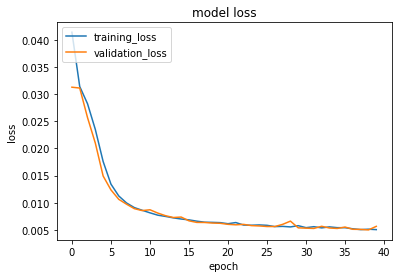

In [6]:
    #Prepare for running DNN
    Xn = X[0:15,] # 15 samples  to later evaluate
    Yn = Y[0:15,]
    X = X[16:,] # rest samples used for training and validation # 80:20
    Y = Y[16:,]
    opt = keras.optimizers.Adam(learning_rate=10e-3)#,  beta_1=0.99)
    model = Sequential()
    model.add(Dense(64, input_dim=16,dtype = 'float64',  kernel_initializer='random_normal', activation='relu'))
    #model.add(Dropout(0.45))
    model.add(Dense(100, activation='relu',dtype= 'float64', kernel_initializer= 'random_normal'))	
    #model.add(Dropout(0.45))
    model.add(Dense(250,kernel_initializer = 'random_normal',  dtype = 'float64', activation = 'relu'))
    #model.add(Dropout(0.45))
    model.add(Dense(350, kernel_initializer = 'random_normal',  dtype = 'float64', activation = 'relu'))
    model.add(Dense(500,dtype = 'float64'))
    # Compile model
    print("The model is compiling")
    #model.compile(loss='mean_squared_logarithmic_error', optimizer=opt)
    model.compile(loss='mean_squared_error',optimizer = opt,  metrics=['mean_absolute_error'])
    #model.compile(loss='mean_squared_error', optimizer=opt)
    print("The model is training")
    history = model.fit(X, Y,validation_split = 0.20, epochs=40, batch_size=1000, verbose=1)
    model.summary()
    
    print(history.history.keys())
    print(history.history['loss'])
    #plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    #plt.title('model accuracy')
    #plt.ylabel('accuracy')
    #plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    #plt.show()
    #plt.savefig("linearmodel_Accuracy_drop.2.png")
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training_loss', 'validation_loss'], loc = 'upper left')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    #plt.show()
    #plot_model(model, to_file='model_shared_input_layer.png')
    plt.savefig("50000_relu_mse_e6_6400_3200_1600_500_50epo.png")
    print("The model is successfully made")
    


In [7]:
score = model.evaluate(Xn,Yn)
print(score[1], score[0], score)
print(model.metrics_names)

1/1 [==============================] - 0s 13ms/step - loss: 0.0060 - mean_absolute_error: 0.0451
0.04509277269244194 0.006027542520314455 [0.006027542520314455, 0.04509277269244194]
['loss', 'mean_absolute_error']


In [8]:
Yn_predicted = model.predict(Xn)
print(np.shape(Yn_predicted))

(15, 500)


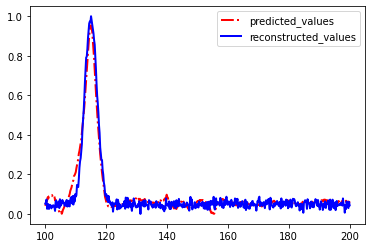

In [13]:
x_axis = np.linspace(100, 200, 500)
#change value of i from 0 to 14
i = 0
plt.plot(x_axis,abs( Yn_predicted[i]), "r-.", ms=4.5, lw=2.0, label='Predicted values')
plt.plot(x_axis, Yn[i], "b", ms=4.5, lw=2.0, label='Test input values')
plt.legend(['predicted_values', 'reconstructed_values'], loc = 'upper right')
plt.savefig("Reconstructed.png")
